## Imaging a Point Cloud Using a Camera Consructed by Specifying Extrinsic and Intrinsic Parameters


In [1]:
%config IPCompleter.greedy=True
%config Completer.use_jedi = False

In [2]:
# # Download all the point cloud from the soruce website: run this once
# import wget
# with open("pointClouds/source.txt") as source:
#     for line in source.readlines():
#         name = line.strip()
#         link = "https://people.sc.fsu.edu/~jburkardt/data/ply/" + name
#         wget.download(link, out ="pointClouds/"+name )

In [3]:
# https://people.sc.fsu.edu/~jburkardt/data/ply/ply.html
# https://stackoverflow.com/questions/50965673/python-display-3d-point-cloud
%matplotlib inline
import numpy as np
import open3d as o3d
import numpy.matlib
import scipy
import matplotlib.pyplot as plt

In [11]:
np.sin(np.pi/6) # numpy considers angle interms of radians

0.49999999999999994

[Ref1](http://ksimek.github.io/2012/08/14/decompose/)
[Ref2](http://www.janeriksolem.net/blog.html)

Assume your camera matrix is 3x4, which transforms homogeneous 3D world coordinates to homogeneous 2D image coordinates. Following Hartley and Zisserman, we'll denote the matrix as P.

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>P</mi>
  <mo>=</mo>
  <mi>K</mi>
  <mo stretchy="false">[</mo>
  <mi>R</mi>
  <mspace width="thinmathspace" />
  <mrow class="MJX-TeXAtom-ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <mo>&#x2212;<!-- − --></mo>
  <mi>R</mi>
  <mi>C</mi>
  <mo stretchy="false">]</mo>
</math>

* The matrix K is a 3x3 upper-triangular matrix that describes the camera's internal parameters like focal length.
* R is a 3x3 rotation matrix whose columns are the directions of the world axes in the camera's reference frame. 
* The vector C is the camera center in world coordinates
* The vector t = -RC gives the position of the world origin in camera coordinates.

PointCloud with 2903 points.
(2903, 3)
[[ 6.05538000e-01  1.83122000e-01 -4.00047228e+03]
 [ 6.49223000e-01  1.29700000e-01 -4.00049487e+03]
 [ 6.01082000e-01  1.05512000e-01 -4.00053334e+03]
 ...
 [-1.45577000e+00  6.74789000e-01 -3.99975510e+03]
 [-1.24479000e+00  6.48768000e-01 -3.99979914e+03]
 [-1.48926000e+00  6.43690000e-01 -3.99977277e+03]]


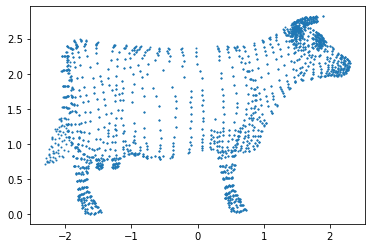

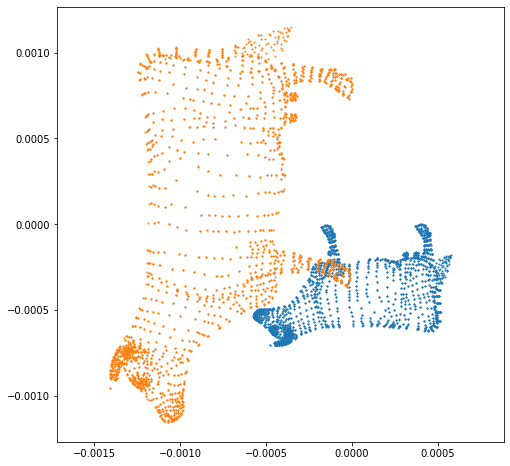

In [4]:
pcd = o3d.io.read_point_cloud("pointClouds/"+"cow.ply") # Read the point cloud
print(pcd)
points = np.asarray(pcd.points)
# points = points[0:5, :]
print(points.shape)
#o3d.visualization.draw_geometries([pcd])
fig, ax = plt.subplots(1,1, sharex=True, sharey=True)
ax.scatter(points[:,0], points[:,1],s=1)

ones = np.ones((points.shape[0], 1))
points = np.concatenate((points, ones), axis=1) # Making the points homogeneous

P = np.array([[1., 0., 0., 0.],
              [0., 1., 0., 0.],
              [0., 0., 1., 0.]])

# Rotation matrix R is an orthonormal marix: column vectors are orithogonal and normalized
# New axes coordinates interms of the current axes: consider column vectors as axes.

# Interpretation:New Axes are aligned with the old axes
R = np.array([[1., 0., 0.],
              [0., 1., 0.],
              [0., 0., 1.]])

K = np.array([[1., 0., 0.],
              [0., 1., 0.],
              [0., 0., 1.]])

t = np.array([[0.],
              [0.],
              [-4000.]])

P1 = np.matmul(K, np.concatenate((R, t), axis=1))# P = K[R|t] = K[R|-RC]

# x and y axes are interchanged: cow must be rotated by 90 degrees
R = np.array([[0., 1., 0.],
              [1., 0., 0.],
              [0., 0., 1.]])

K = np.array([[2., 0., 0.],
              [0., 2., 0.],
              [0., 0., 1.]])

P2 = np.matmul(K, np.concatenate((R, t), axis=1))

transfromed = np.matmul(P1, points.T).T
print(transfromed)
transfromed = transfromed/np.matlib.repmat(transfromed[:,2], 3, 1).T # devide by the last coordinate
fig, ax = plt.subplots(1,1, sharex=True, sharey=True,figsize=(8,8))
ax.scatter(transfromed[:,0], transfromed[:,1],s=1)

transfromed = np.matmul(P2, points.T).T
transfromed = transfromed/np.matlib.repmat(transfromed[:,2], 3, 1).T
ax.scatter(transfromed[:,0], transfromed[:,1],s=1)
ax.axis('equal')
plt.show()

- [QR decomposition](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html)
- [Flip array in the up/down direction](https://numpy.org/doc/stable/reference/generated/numpy.flipud.html)


In [5]:
np.set_printoptions(precision=4)
print('P1\n', P1)
print('P2\n', P2)

# RQ Decomposition
# http://ksimek.github.io/2012/08/14/decompose/
def rq(M):
    # decomposition of a matrix A into a product A = QR of an orthogonal matrix Q and an upper triangular matrix R.
    Q, R = np.linalg.qr(np.flipud(M).T)
    # print(Q)
    # print(R)
    R = np.flipud(R.T)
    R = np.fliplr(R)
    Q = Q.T;
    Q = np.flipud(Q)
    return R, Q

P1
 [[ 1.e+00  0.e+00  0.e+00  0.e+00]
 [ 0.e+00  1.e+00  0.e+00  0.e+00]
 [ 0.e+00  0.e+00  1.e+00 -4.e+03]]
P2
 [[ 0.e+00  2.e+00  0.e+00  0.e+00]
 [ 2.e+00  0.e+00  0.e+00  0.e+00]
 [ 0.e+00  0.e+00  1.e+00 -4.e+03]]


In [6]:
# P = [M|-MC]
# P = K[R|-RC]
M = P2[:, 0:3]
C = np.linalg.inv(M)@P1[:,3] # camera center in world coordinates
K, R = rq(M)
#K, R = np.linalg.qr(M)
# K, R = scipy.linalg.rq(M)
# make diagonal of K positive
T = np.diag(np.sign(np.diag(K)));
K = K @ T;
R = T @ R; # (T is its own inverse)
print(K)
print(R)

[[2. 0. 0.]
 [0. 2. 0.]
 [0. 0. 1.]]
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [7]:
 # make diagonal of K positive
T = np.diag(np.sign(np.diag(K)));
K = K @ T;
R = T @ R; # (T is its own inverse)
print(K)
print(R)

[[2. 0. 0.]
 [0. 2. 0.]
 [0. 0. 1.]]
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [8]:
# P from Hartley and Zisserman Example 6.2
Phz = np.array(
[[3.53553e+2, 3.39645e+2, 2.77744e+2, -1.44946e+6],
[-1.03528e+2, 2.33212e+1, 4.59607e+2, -6.32525e+5],
[7.07107e-1, -3.53553e-1, 6.12372e-1, -9.18559e+2]])

In [9]:
# P = [M|-MC]
# P = K[R|-RC]
M = Phz[:, 0:3]
C = -np.linalg.inv(M)@Phz[:,3] # camera center in world coordinates
K, R = rq(M)
# K, R = scipy.linalg.rq(M)
# make diagonal of K positive
T = np.diag(np.sign(np.diag(K)));
K = K @ T;
R = T @ R; # (T is its own inverse)
print(C)
print(K)
print(R)

[1000.0007 2000.002  1500.0003]
[[468.1647  91.2251 300.    ]
 [  0.     427.2009 199.9999]
 [  0.       0.       1.    ]]
[[ 0.4138  0.9091  0.0471]
 [-0.5734  0.2201  0.7892]
 [ 0.7071 -0.3536  0.6124]]
